In [49]:
# Import the required libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path

In [50]:
df = pd.read_csv(Path("SafeHarbor_coins.csv"), header=0, index_col="dates", infer_datetime_format=True, parse_dates=True)

In [51]:
df

,coin,date,prices,market_caps,total_vol
dates,,,,,
2021-12-31,bitcoin,1.640995e+12,46319.651088,8.761929e+11,2.589535e+10
2022-01-01,bitcoin,1.641082e+12,47816.077676,9.045519e+11,1.890459e+10
2022-01-02,bitcoin,1.641168e+12,47387.212168,8.975361e+11,3.375613e+10
2022-01-03,bitcoin,1.641254e+12,46531.140861,8.803302e+11,2.189002e+10
2022-01-04,bitcoin,1.641341e+12,45938.024272,8.762427e+11,2.489599e+10
...,...,...,...,...,...
2022-11-03,litecoin,1.667520e+12,61.977356,4.423794e+09,1.856214e+09
2022-11-04,litecoin,1.667606e+12,67.564797,4.830118e+09,1.988837e+09
2022-11-05,litecoin,1.667693e+12,69.655678,5.012880e+09,1.813550e+09


In [12]:
# Verify the data types using dtypes
df.dtypes

coin            object
date           float64
prices         float64
market_caps    float64
total_vol      float64
dtype: object

In [13]:
df=df.drop(columns=['date'])


In [14]:
df

,coin,prices,market_caps,total_vol
dates,,,,
2021-12-31,bitcoin,46319.651088,8.761929e+11,2.589535e+10
2022-01-01,bitcoin,47816.077676,9.045519e+11,1.890459e+10
2022-01-02,bitcoin,47387.212168,8.975361e+11,3.375613e+10
2022-01-03,bitcoin,46531.140861,8.803302e+11,2.189002e+10
2022-01-04,bitcoin,45938.024272,8.762427e+11,2.489599e+10
...,...,...,...,...
2022-11-03,litecoin,61.977356,4.423794e+09,1.856214e+09
2022-11-04,litecoin,67.564797,4.830118e+09,1.988837e+09
2022-11-05,litecoin,69.655678,5.012880e+09,1.813550e+09


In [52]:
grouped_std=df.groupby('coin')

grouped_df = {"grouped_std": grouped_std}
for coin in df['coin'].unique():
    coin_block=grouped_std.get_group(coin)
    print(coin_block['prices'].std())
print(coin_block)
    


9817.649506909456
770.7404993285752
0.001232672400511701
74.05995926498426
0.0018492307767010853
0.0019228965943213297
0.18615923597238895
0.2980615340279821
0.03757086882651627
0.4995727190379588
6.5320322043411565
37.76244746697879
7.303711109492998e-06
782.9915694516152
0.0013579922476015859
0.006402515938721941
4.074585449829442
9816.267563985031
30.17986728651967
3.047862665667253
31.126910075461012
                coin          date      prices   market_caps     total_vol
dates                                                                     
2021-12-31  litecoin  1.640995e+12  146.604661  1.016561e+10  9.271442e+08
2022-01-01  litecoin  1.641082e+12  151.085658  1.047364e+10  6.005942e+08
2022-01-02  litecoin  1.641168e+12  151.506997  1.052324e+10  6.130410e+08
2022-01-03  litecoin  1.641254e+12  148.680774  1.030904e+10  6.587976e+08
2022-01-04  litecoin  1.641341e+12  146.723374  1.024778e+10  7.399783e+08
...              ...           ...         ...           ...       

In [46]:
grouped_std=df.groupby(['coin']).std()["prices"]
grouped_std.head(20)



In [47]:
type(grouped_std)

pandas.core.series.Series

In [48]:
grouped_std = pd.DataFrame(grouped_std)
grouped_std

,prices
coin,
avalanche-2,30.179867
binance-usd,0.001923
binancecoin,74.059959
bitcoin,9817.649507
cardano,0.298062
dai,0.001358
dogecoin,0.037571
ethereum,770.740499
litecoin,31.126910


In [15]:
df['coin'].unique()

array(['bitcoin', 'ethereum', 'tether', 'binancecoin', 'usd-coin',
       'binance-usd', 'ripple', 'cardano', 'dogecoin', 'matic-network',
       'polkadot', 'solana', 'shiba-inu', 'staked-ether', 'dai', 'tron',
       'okb', 'wrapped-bitcoin', 'avalanche-2', 'uniswap', 'litecoin'],
      dtype=object)

In [21]:
df_market_data_scaled = pd.DataFrame(columns=["coin", "std"])

In [9]:
df_market_data_scaled

,coin,std


In [7]:
sliced_df=df.iloc[0:181,:]

array(['bitcoin', 'ethereum', 'tether', 'binancecoin', 'usd-coin',
       'binance-usd', 'ripple', 'cardano', 'dogecoin', 'matic-network',
       'polkadot', 'solana', 'shiba-inu', 'staked-ether', 'dai', 'tron',
       'okb', 'wrapped-bitcoin', 'avalanche-2', 'uniswap', 'litecoin'],
      dtype=object)

<AxesSubplot:title={'center':'coins'}, xlabel='dates'>

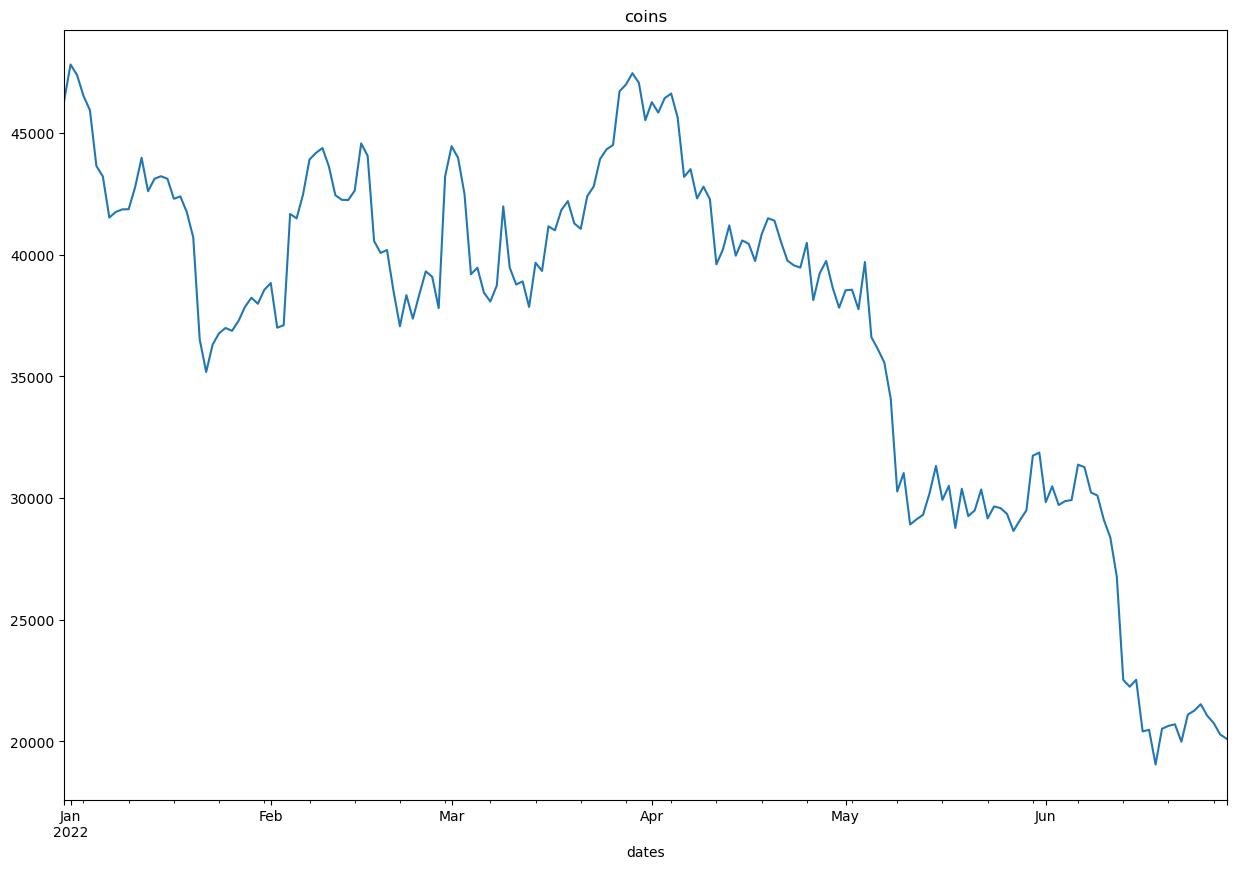

In [12]:
sliced_df["prices"].plot(figsize=[15,10], title="coins")

In [13]:
sliced_df

,coin,prices,market_caps,total_vol
dates,,,,
2021-12-31,bitcoin,46319.651088,8.761929e+11,2.589535e+10
2022-01-01,bitcoin,47816.077676,9.045519e+11,1.890459e+10
2022-01-02,bitcoin,47387.212168,8.975361e+11,3.375613e+10
2022-01-03,bitcoin,46531.140861,8.803302e+11,2.189002e+10
2022-01-04,bitcoin,45938.024272,8.762427e+11,2.489599e+10
...,...,...,...,...
2022-06-25,bitcoin,21525.880362,4.101108e+11,1.615244e+10
2022-06-26,bitcoin,21052.805398,4.016458e+11,1.539270e+10
2022-06-27,bitcoin,20751.477531,3.959146e+11,1.771901e+10


In [14]:
sliced_df_copy=sliced_df.copy("coin")

In [15]:
sliced_df_copy

,coin,prices,market_caps,total_vol
dates,,,,
2021-12-31,bitcoin,46319.651088,8.761929e+11,2.589535e+10
2022-01-01,bitcoin,47816.077676,9.045519e+11,1.890459e+10
2022-01-02,bitcoin,47387.212168,8.975361e+11,3.375613e+10
2022-01-03,bitcoin,46531.140861,8.803302e+11,2.189002e+10
2022-01-04,bitcoin,45938.024272,8.762427e+11,2.489599e+10
...,...,...,...,...
2022-06-25,bitcoin,21525.880362,4.101108e+11,1.615244e+10
2022-06-26,bitcoin,21052.805398,4.016458e+11,1.539270e+10
2022-06-27,bitcoin,20751.477531,3.959146e+11,1.771901e+10


In [23]:
df["coin_id"] = df.iloc["coin"]

TypeError: Cannot index by location index with a non-integer key

In [24]:
df

,coin,prices,market_caps,total_vol,coin_id
dates,,,,,
2021-12-31,bitcoin,46319.651088,8.761929e+11,2.589535e+10,2021-12-31
2022-01-01,bitcoin,47816.077676,9.045519e+11,1.890459e+10,2022-01-01
2022-01-02,bitcoin,47387.212168,8.975361e+11,3.375613e+10,2022-01-02
2022-01-03,bitcoin,46531.140861,8.803302e+11,2.189002e+10,2022-01-03
2022-01-04,bitcoin,45938.024272,8.762427e+11,2.489599e+10,2022-01-04
...,...,...,...,...,...
2022-11-03,litecoin,61.977356,4.423794e+09,1.856214e+09,2022-11-03
2022-11-04,litecoin,67.564797,4.830118e+09,1.988837e+09,2022-11-04
2022-11-05,litecoin,69.655678,5.012880e+09,1.813550e+09,2022-11-05
